## 필요한 패키지 및 기본 제공 함수 (Requirements)

In [1]:
!pip install PyKomoran
!pip install nltk
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 KB 20.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=f67f928972f5414eabc3290b84cfa89c98cd827f4e19179b6201bd28ddb442a4
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [2]:
# Data URLs
training_data_url = "https://drive.google.com/file/d/1UQZzMlBmSxAxFML7zZm1N3tc63pIfCOq/view?usp=share_link"
test_data_url = "https://drive.google.com/file/d/1UUK4-J-P8Bh5aJg0-VqaG9gDU7zRtF8j/view?usp=share_link"

# Download training data
training_data_file_id = training_data_url.split("/")[-2]
!gdown $training_data_file_id

# Download test data
test_data_file_id = test_data_url.split("/")[-2]
!gdown $test_data_file_id

Downloading...
From: https://drive.google.com/uc?id=1UQZzMlBmSxAxFML7zZm1N3tc63pIfCOq
To: /content/newsdata_train.json
100% 4.80M/4.80M [00:00<00:00, 87.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UUK4-J-P8Bh5aJg0-VqaG9gDU7zRtF8j
To: /content/newsdata_test.json
100% 1.17M/1.17M [00:00<00:00, 126MB/s]


In [3]:
# Import libraries
import nltk
nltk.download('punkt')

import json
import torch
from tqdm.notebook import trange, tqdm
from PyKomoran import *
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
# Provided functions

def load_data(path) :
  with open(path) as f :
    data = json.load(f)

  return data


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

def tokenizer(sentences):
    sentence = []
    for s in sent_tokenize(sentences) :
        sentence += komoran.get_morphes_by_tags(s, tag_list=["NNG", "NNP", "VV"])

    return sentence

# TF-IDF와 MLP를 이용한 문서 분류

## PyKomoran 형태소 분석기

In [5]:
komoran = Komoran("EXP")

str_to_analyze = "자연어 처리는 인간의 언어 현상을 컴퓨터와 같은 기계를 이용해서 묘사할 수 있도록 연구하고\
 이를 구현하는 인공지능의 주요 분야 중 하나입니다."

# get_nouns(): 입력 문장에서 명사만 추출합니다.
print(komoran.get_nouns(str_to_analyze))

# get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
print(komoran.get_morphes_by_tags(str_to_analyze, tag_list=['NNP', 'NNG', 'SF']))

# get_plain_text(): 입력 문장 내에 형태소/품사 형태로 태그를 합니다.
print(komoran.get_plain_text(str_to_analyze))

['자연어', '처리', '인간', '언어', '현상', '컴퓨터', '기계', '이용', '묘사', '연구', '구현', '인공지능', '주요', '분야']
['자연어', '처리', '인간', '언어', '현상', '컴퓨터', '기계', '이용', '묘사', '연구', '구현', '인공지능', '주요', '분야', '.']
자연어/NNP 처리/NNG 는/JX 인간/NNG 의/JKG 언어/NNG 현상/NNG 을/JKO 컴퓨터/NNG 와/JC 같/VA 은/ETM 기계/NNG 를/JKO 이용/NNG 하/XSV 아서/EC 묘사/NNG 하/XSV ㄹ/ETM 수/NNB 있/VV 도록/EC 연구/NNG 하/XSV 고/EC 이/NP 를/JKO 구현/NNG 하/XSV 는/ETM 인공지능/NNP 의/JKG 주요/NNG 분야/NNG 중/NNB 하나/NR 이/VCP ㅂ니다/EF ./SF


## 데이터 로드 및 전처리 (Preprocess)

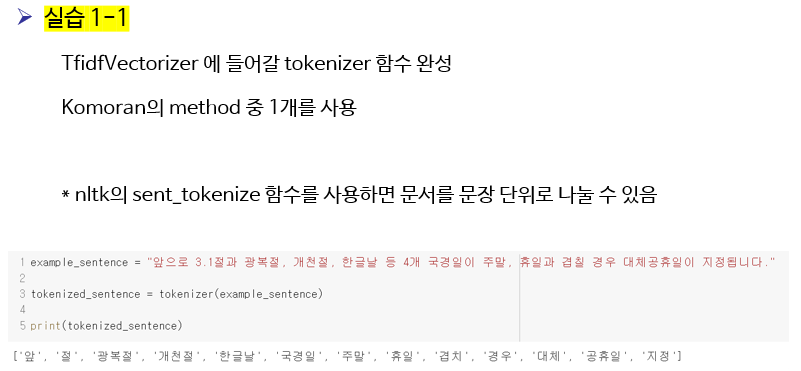

In [6]:
# 실습 1-1
# komoran 형태소 분석기를 활용하여 TfidfVectorizer에 들어갈 tokenizer 함수를 완성해주세요.
# sentences는 str type이지만 여러 문장으로 구성되어 있을 수 있습니다.
# nltk library의 sent_tokenize를 이용하면 여러 문장으로 된 하나의 str 변수를 문장 단위로 나눌 수 있습니다.
# input : sentences (type : List)
# output : sentence (type : List)

def tokenizer(sentences: list) -> list:
    
    # 이곳에 코드를 작성해주세요 #
    sentence = []
    for s in sent_tokenize(sentences):
        sentence += komoran.get_morphes_by_tags(s, tag_list=["NNP", "NNG", "VV"])
    # ------------------------- #

    return sentence

In [7]:
example_sentence = "앞으로 3.1절과 광복절, 개천절, 한글날 등 4개 국경일이 주말, 휴일과 겹칠 경우 대체공휴일이 지정됩니다. 추가된 대체 공휴일을 잘 즐기시기 바라겠습니다."
print(sent_tokenize(example_sentence))

tokenized_sentence = tokenizer(example_sentence)

print(tokenized_sentence)

['앞으로 3.1절과 광복절, 개천절, 한글날 등 4개 국경일이 주말, 휴일과 겹칠 경우 대체공휴일이 지정됩니다.', '추가된 대체 공휴일을 잘 즐기시기 바라겠습니다.']
['앞', '절', '광복절', '개천절', '한글날', '국경일', '주말', '휴일', '겹치', '경우', '대체', '공휴일', '지정', '추가', '공휴일', '즐기', '바라']


In [8]:
train_path = "./newsdata_train.json"
test_path = "./newsdata_test.json"
label_list = ['IT', '경제', '문화', '스포츠', '정치']

train_data = load_data(train_path)
test_data = load_data(test_path)

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=tokenizer
)

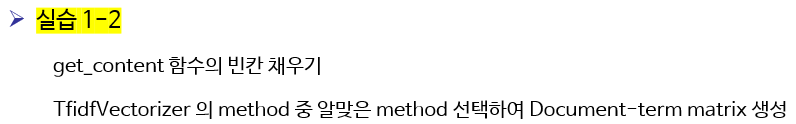

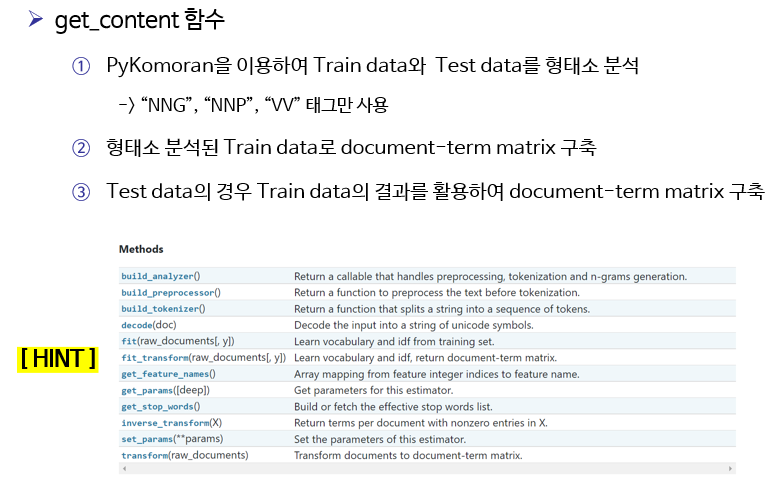

In [9]:
# 실습 1-2
# TfidfVectorizer의 method 중 1개를 선택하여 document-term matrix를 생성하는 코드를 작성해주세요.
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# input : doc_list (type : List)
# output : X (type : sparse matrix)

def get_content(data, tfidf_vectorizer, mode="train") :

    doc_list = []
    for d in data:
        doc_list.append(d["content"])


    if mode == "train" :

        # 이곳에 코드를 작성해주세요 #
        X = tfidf_vectorizer.fit_transform(doc_list)
        # ------------------------- #

        print(
            'Document-term matrix from train set : (sentence {}, feature {})'.format(X.shape[0], X.shape[1])
        )

    elif mode == "test" :

        # 이곳에 코드를 작성해주세요 #
        X = tfidf_vectorizer.transform(doc_list)
        # ------------------------- #

        print(
            'Document-term matrix from test set : (sentence {}, feature {})'.format(X.shape[0], X.shape[1])
        )

    content_tensors = torch.tensor(X.toarray(), dtype=torch.float32)

    return content_tensors


def get_label(data, label_list) :

    labels2idx = {label: i for i, label in enumerate(label_list)}

    labels = list()

    for doc in data:
        labels.append(labels2idx[doc["topic"]])

    label_tensors = torch.tensor(labels, dtype=torch.long)

    return label_tensors


def make_dataset(content_tensor, label_tensor) :
    return torch.utils.data.TensorDataset(content_tensor, label_tensor)

In [10]:
train_input = get_content(train_data, tfidf_vectorizer)
train_output = get_label(train_data, label_list)

train_dataset = make_dataset(train_input, train_output)

test_input = get_content(test_data, tfidf_vectorizer, mode="test")
test_output = get_label(test_data, label_list)

test_dataset = make_dataset(test_input, test_output)

Document-term matrix from train set : (sentence 800, feature 22668)
Document-term matrix from test set : (sentence 200, feature 22668)


## 모델 학습 (Train)

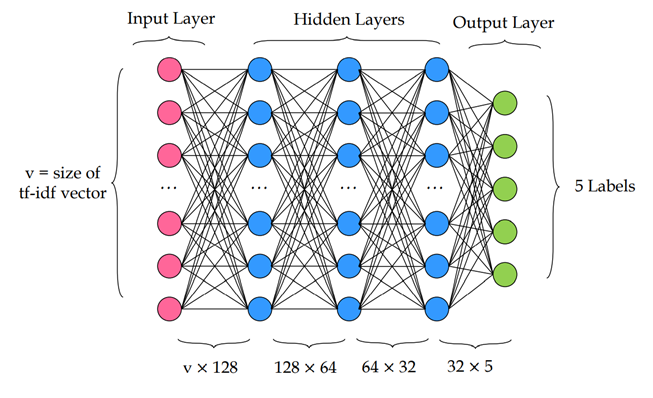

In [11]:
input_data = torch.randn(2, 3) # (input_dim, hidden_size)

input_data

tensor([[-0.1536,  0.7711, -0.2037],
        [-0.4238, -0.7748,  0.1074]])

In [12]:
m = torch.nn.Linear(3, 5) # (hidden_size, output_dim)

output = m(input_data)

print("*** Before ReLU Activation function ***\n")
print(output)

output = torch.nn.functional.relu(output)

print("\n*** After ReLU Activation function ***\n")
print(output)

print(output.size) # (input_dim, output_dim)

*** Before ReLU Activation function ***

tensor([[ 0.4334, -0.0767,  0.2799, -0.0654, -0.1793],
        [ 0.1278,  0.0611,  0.2715, -0.9840,  0.4227]],
       grad_fn=<AddmmBackward0>)

*** After ReLU Activation function ***

tensor([[0.4334, 0.0000, 0.2799, 0.0000, 0.0000],
        [0.1278, 0.0611, 0.2715, 0.0000, 0.4227]], grad_fn=<ReluBackward0>)
<built-in method size of Tensor object at 0x7f3a85610770>


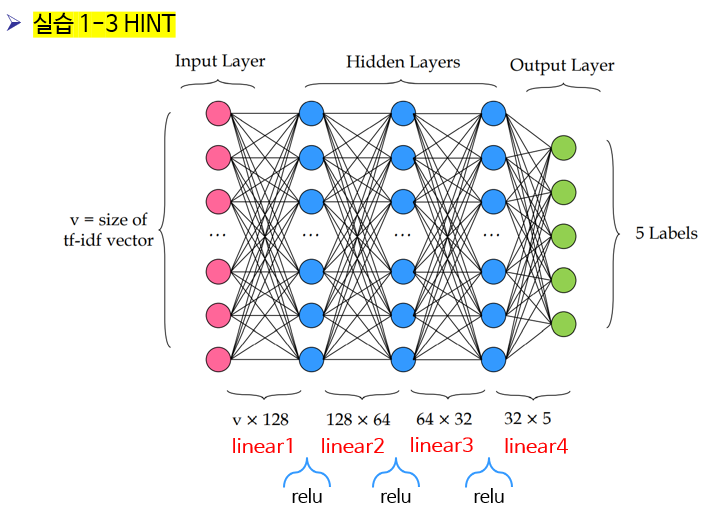

In [13]:
# 실습 1-3
# torch.nn.Linear(input, output) 함수를 사용하여 모델을 구현해주세요
# 모델 각 레이어 가중치의 크기는 위 그림을 따라 설정해주세요

class MLP(torch.nn.Module):

    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
 
        # 이곳에 코드를 작성해주세요 #
        self.linear1 = torch.nn.Linear(input_dim, 1024)
        self.linear2 = torch.nn.Linear(1024, 512)
        self.linear3 = torch.nn.Linear(512, 64)
        self.linear4 =torch.nn.Linear(64, 5)
        # ------------------------- #

    def forward(self, inputs):
        # 이곳에 코드를 작성해주세요 #
        y1 = self.linear1(inputs)
        y2 = self.linear2(y1)
        y3 = self.linear3(y2)
        # ------------------------- #

        return torch.sigmoid(self.linear4(y3))

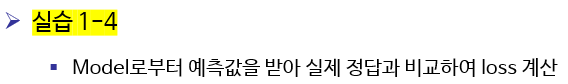

In [14]:
# 실습 1-4
# model로부터 예측값을 받아오고,
# 예측값과 정답 간의 loss를 계산하는 코드를 작성해주세요.
# loss 함수로는 crossentropy loss 함수를 사용합니다. (criterion에 정의되어 있음)
# loss function에 입력되는 예측값(prediction)과 실제 정답(label)의 shape에 유의할 것!

def train(model, train_dataset, args):

    set_seed(42)

    train_batch_size = args["train_batch_size"]
    num_train_epochs = args["num_train_epochs"]
    device = args["device"]
    learning_rate = args["learning_rate"]

    # optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Loss function
    criterion = torch.nn.CrossEntropyLoss()

    train_dataLoader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=train_batch_size)

    train_iterator = trange(num_train_epochs, desc="Epoch")

    print("\n***** Running training *****")
    print("  Num examples = {}".format(len(train_dataset)))
    print("  Num Epochs = {}".format(num_train_epochs))
    print("  Train Batch size = {}".format(train_batch_size))
    print("  Device = ", device)

    model.to(device)
    model.train(True)
    model.zero_grad()
    for epoch in train_iterator:
        loss = 0
        for batch in train_dataLoader:
            input_vector = batch[0].to(device)
            label = batch[1].to(device)
            
            # 이곳에 코드를 작성해주세요 #
            predict = model(input_vector)
            loss = criterion(predict, label)
            # ------------------------- #
            loss += loss.item()

            loss.backward()
            optimizer.step()
            model.zero_grad()

        if (epoch + 1) % 100 == 0:
            print("\n********** Train Result **********")
            print("  Epoch / Total Epoch : {} / {}".format(epoch + 1, num_train_epochs))
            print("  Loss : {:.4f}".format(loss))

    model.train(False)
# end of train

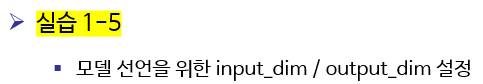

In [15]:
# 실습 1-5
# model 선언을 위한 input_dim과 output_dim 을 설정해주세요

input_dim = train_input.shape[-1] # 이곳에 코드를 작성해주세요 #
output_dim = len(label_list) # 이곳에 코드를 작성해주세요 #

model = MLP(input_dim, output_dim)


args = dict()
args["train_batch_size"] = 64
args["device"] = torch.device("cuda" if torch.cuda.is_available() else "cpu")
args["learning_rate"] = 0.001
args["num_train_epochs"] = 1000

train(model, train_dataset, args)

Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]


***** Running training *****
  Num examples = 800
  Num Epochs = 1000
  Train Batch size = 64
  Device =  cuda

********** Train Result **********
  Epoch / Total Epoch : 100 / 1000
  Loss : 1.9235

********** Train Result **********
  Epoch / Total Epoch : 200 / 1000
  Loss : 1.8666

********** Train Result **********
  Epoch / Total Epoch : 300 / 1000
  Loss : 1.8951

********** Train Result **********
  Epoch / Total Epoch : 400 / 1000
  Loss : 1.9235

********** Train Result **********
  Epoch / Total Epoch : 500 / 1000
  Loss : 1.9235

********** Train Result **********
  Epoch / Total Epoch : 600 / 1000
  Loss : 1.9235

********** Train Result **********
  Epoch / Total Epoch : 700 / 1000
  Loss : 1.8951

********** Train Result **********
  Epoch / Total Epoch : 800 / 1000
  Loss : 1.8666

********** Train Result **********
  Epoch / Total Epoch : 900 / 1000
  Loss : 1.8808

********** Train Result **********
  Epoch / Total Epoch : 1000 / 1000
  Loss : 1.8666


## 모델 학습 후 평가 (Evaluation)

In [16]:
def evaluate(model, test_dataset, args, news_num=150):
    test_dataLoader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=1)

    device = args["device"]

    print("***** Running evaluation *****")
    print("  Num examples = {}".format(len(test_dataset)))
    print("  Test Batch size = 1")

    model.eval()
    pred = None
    label = None
    for batch in test_dataLoader:
        input_vector = batch[0].to(device)

        with torch.no_grad():
            predict = model(input_vector)

        if pred is None:
            pred = predict.detach().cpu().numpy()
            label = batch[1].numpy()
        else:
            pred = np.append(pred, predict.detach().cpu().numpy(), axis=0)
            label = np.append(label, batch[1].numpy(), axis=0)

    pred = np.argmax(pred, axis=1)

    sample_pred1 = pred[news_num]
    sample_label1 = label[news_num]
    sample_result1 = {"pred": sample_pred1, "label": sample_label1}

    news_num -= 50
    sample_pred2 = pred[news_num]
    sample_label2 = label[news_num]
    sample_result2 = {"pred": sample_pred2, "label": sample_label2}

    accuracy = (pred == label).sum() / 200

    return accuracy, sample_result1, sample_result2

In [17]:
accuracy, sample_result1, sample_result2 = evaluate(model, test_dataset, args, news_num=199)

print("\n********** Total Test Result **********")
print("  Accuracy {}".format(accuracy))
print("\n********** Sample Result **********")
print("  Sample 1 pred : {} ({})".format(sample_result1["pred"], label_list[1]))
print("  Sample 1 label : {} ({})".format(sample_result1["label"], label_list[1]))
print("  Sample 1 : {}".format(test_data[199]))
print("\n********** Sample Result **********")
print("  Sample 2 pred : {} ({})".format(sample_result2["pred"], label_list[1]))
print("  Sample 2 label : {} ({})".format(sample_result2["label"], label_list[4]))
print("  Sample 1 : {}".format(test_data[149]))

***** Running evaluation *****
  Num examples = 200
  Test Batch size = 1

********** Total Test Result **********
  Accuracy 0.635

********** Sample Result **********
  Sample 1 pred : 1 (경제)
  Sample 1 label : 1 (경제)
  Sample 1 : {'num': 999, 'id': 'NIRW1900000025.8010', 'topic': '경제', 'content': "■ 투싼ix 수소연료 전지차 투싼ix 수소연료 전지차는 SUV 투싼ix에 현대차가 독자 개발한 100㎾급 연료전지 시스템과 2탱크 수소저장 시스템을 얹은 차량이다. 수소 0.96㎏당 100㎞(유럽 연비 시험 기준)를 달리는데 1회 충전으로 갈 수 있는 최대 거리가 588㎞에 달한다. 보통 전기차가 1회 충전으로 100~150㎞를 달리는 것과 비교하면 수소연료전지차는 장거리 운행에 더 적합해 보인다. 최고 속도는 시속 160㎞이며 매연 없이 물만 배출하는 무공해 차량으로 영하 20도 아래 혹한에서도 시동이 켜진다. ■ 맥스크루즈 프리미엄 대형 SUV 맥스크루즈는 전장이 국내 SUV 중 가장 긴 4915㎜다. 외관은 전면의 대형 라디에이터 그릴과 개방감이 돋보이는 측면 윈도우 등으로 역동성과 입체감을 극대화했다. 실내 공간은 좌, 우측 시트를 각각 접거나 앞뒤로 움직일 수 있는 2열 독립식 캡틴 시트(6인승 모델에 한함) 등으로 2, 3열의 편의성을 끌어올렸다. 2.2 디젤 엔진과 6단 자동 변속기를 달아 최고출력 200마력, 최대토크 44.5kg·m의 성능을 내며 복합연비는 ℓ당 11.9㎞다. 타이어공기압경보장, 차체 자세 제어장치, 열선 스티어링 휠 등 다양한 안전·편의 사양도 적용했다. ■ 2013년형 벨로스터 2013년형 벨로스터는 국내 최초로 세계적인 음반 프로듀서인 닥터 드레의 음악적 노하우를 살린 사운드 전문기업 '비츠 

## 전체 실행 코드

In [ ]:
# main

train_path = "./newsdata_train.json"
test_path = "./newsdata_test.json"
label_list = ['IT', '경제', '문화', '스포츠', '정치']

train_data = load_data(train_path)
test_data = load_data(test_path)

args = dict()
args["train_batch_size"] = 64
args["device"] = torch.device("cuda" if torch.cuda.is_available() else "cpu")
args["learning_rate"] = 0.001
args["num_train_epochs"] = 1000

komoran = Komoran("EXP")

tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer)

train_input = get_content(train_data, tfidf_vectorizer)
train_output = get_label(train_data, label_list)

train_dataset = make_dataset(train_input, train_output)

test_input = get_content(test_data, tfidf_vectorizer, mode="test")
test_output = get_label(test_data, label_list)

test_dataset = make_dataset(test_input, test_output)

input_dim = train_input.shape[-1]
output_dim = len(label_list)

model = MLP(input_dim, output_dim)

train(model, train_dataset, args)

accuracy, sample_result = evaluate(model, test_dataset, args, news_num=900)

print("\n********** Total Test Result **********")
print("  Accuracy {}".format(accuracy))
print("  Sample pred : {}".format(sample_result["pred"]))
print("  Sample label : {}".format(sample_result["label"]))

# Word embedding과 CNN을 이용한 문서 분류

## 데이터 로드 및 전처리 (Preprocess)



1.   PyKomoran을 이용하여 train data와 test data를 형태소 분석 (품사 종류와 상관없이 모든 형태소를 이용함)
2.   형태소 분석한 train data를 이용하여 word2idx 구축
3.   train data의 label들을 이용하여 label2idx 구축
4.   word2idx와 label2idx를 이용하여 train data와 test data의 word와 label들을 index로 변환

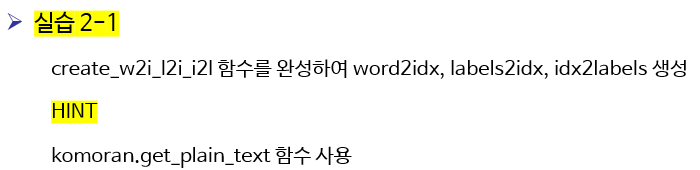

In [23]:
# 실습 2-1
# word2idx, labels2idx, idx2labels 를 반환하는 함수를 완성해주세요.

def create_w2i_l2i_i2l(data, label_list, komoran) :

    # 이곳에 코드를 작성해주세요 #
    word2idx = {
        "<pad>": 0,
        "<unk>": 1
    }
    
    pos_results = set()
    for d in tqdm(data):
        sentences = sent_tokenize(d['content'])
        for s in sentences:
            pos_results.update(komoran.get_plain_text(s).split(" "))
    
    for idx, token in enumerate(sorted(pos_results)):
        word2idx[token] = idx + 2
    
    labels2idx = {label: i for i, label in enumerate(label_list)}
    idx2labels = {i: label for label, i in enumerate(label_list)}

    # ------------------------- #

    return word2idx, labels2idx, idx2labels

In [19]:
word2idx, labels2idx, idx2labels = create_w2i_l2i_i2l(train_data, label_list, komoran)

  0%|          | 0/800 [00:00<?, ?it/s]

In [24]:
def convert_examples_to_features(data, word2idx, labels2idx, komoran, max_length=512):
    input_ids = list()
    labels = list()

    for doc in tqdm(data):
        doc_ids = []
        sentences = sent_tokenize(doc["content"])
        for sentence in sentences:
            doc_ids.extend(
                [
                    word2idx[w if w in word2idx else '<unk>']
                    for w in komoran.get_plain_text(sentence).split(' ')
                ]
            )

        if len(doc_ids) < max_length:
            doc_ids += [word2idx['<pad>']] * (max_length - len(doc_ids))
            
        elif len(doc_ids) > max_length:
            doc_ids = doc_ids[:max_length]

        input_ids.append(doc_ids)
        labels.append(labels2idx[doc["topic"]])

    return input_ids, labels


def make_dataset(input_ids, labels):
    return torch.utils.data.TensorDataset(torch.tensor(input_ids, dtype=torch.long),
                                          torch.tensor(labels, dtype=torch.long))

In [25]:
train_inputs, train_labels = convert_examples_to_features(train_data, word2idx, labels2idx, komoran, max_length=512)
train_dataset = make_dataset(train_inputs, train_labels)

test_inputs, test_labels = convert_examples_to_features(test_data, word2idx, labels2idx, komoran, max_length=512)
test_dataset = make_dataset(test_inputs, test_labels)

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

## 모델 정의

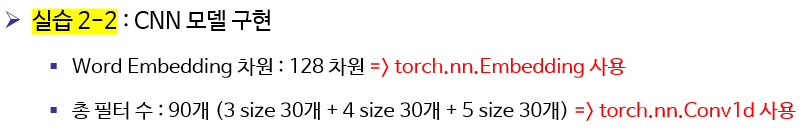

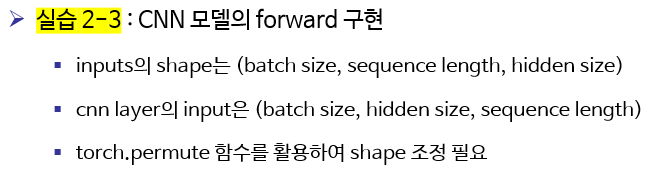

In [26]:
# 실습 2-2 & 2-3
# torch.nn.Embedding 함수와 torch.nn.Conv1d 함수를 사용하여 모델을 구현해주세요

class CNN(torch.nn.Module):
    def __init__(self, vocab_size, output_dim):
        super(CNN, self).__init__()

        # 이곳에 코드를 작성해주세요 #
        self.word_embed = torch.nn.Embedding(num_embeddings=vocab_size, embedding_dim=128,)
        self.conv_layer1 = torch.nn.Conv1d(128, 30, 3)
        self.conv_layer2 = torch.nn.Conv1d(128, 30, 4)
        self.conv_layer3 = torch.nn.Conv1d(128, 30, 5)
        # ------------------------- #
        
        self.dropout = torch.nn.Dropout(0.1)
        self.fc = torch.nn.Linear(3 * 30, output_dim, bias=True)

    def forward(self, inputs):

        # 이곳에 코드를 작성해주세요 #
        # inputs: (B, L)
        embedded = self.word_embed(inputs) # (B, L, C_in)

        conv1 = self.conv_layer1(embedded.permute(0, 2, 1)).permute(0, 2, 1).max(1)[0]
        conv2 = self.conv_layer2(embedded.permute(0, 2, 1)).permute(0, 2, 1).max(1)[0]
        conv3 = self.conv_layer3(embedded.permute(0, 2, 1)).permute(0, 2, 1).max(1)[0] # (max_value, max_index)

        conv1 = torch.nn.functional.relu(conv1)
        conv2 = torch.nn.functional.relu(conv2)
        conv3 = torch.nn.functional.relu(conv3)
        # ------------------------- #

        x = torch.cat([conv1, conv2, conv3], dim=1)

        output = self.fc(self.dropout(x))

        return output

## 학습 함수

In [27]:
def train(model, train_dataset, args):

    set_seed(42)

    train_batch_size = args["train_batch_size"]
    num_train_epochs = args["num_train_epochs"]
    device = args["device"]
    learning_rate = args["learning_rate"]

    # optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Loss function
    criterion = torch.nn.CrossEntropyLoss()

    train_dataLoader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=train_batch_size)

    train_iterator = trange(num_train_epochs, desc="Epoch")

    print("\n***** Running training *****")
    print("  Num examples = {}".format(len(train_dataset)))
    print("  Num Epochs = {}".format(num_train_epochs))
    print("  Train Batch size = {}".format(train_batch_size))
    print("  Device = ", device)

    model.to(device)
    model.train(True)
    model.zero_grad()
    for epoch in train_iterator:
        loss = 0
        for batch in train_dataLoader:
            input_vector = batch[0].to(device)
            label = batch[1].to(device)
            predict = model(input_vector)

            loss = criterion(predict, label)
            loss += loss.item()

            loss.backward()
            optimizer.step()
            model.zero_grad()

        if (epoch + 1) % 100 == 0:
            print("\n********** Train Result **********")
            print("  Epoch / Total Epoch : {} / {}".format(epoch + 1, num_train_epochs))
            print("  Loss : {:.4f}".format(loss))

    model.train(False)
# end of train

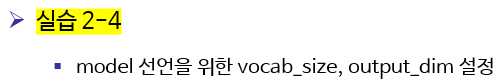

In [28]:
# 실습 2-4
# model 선언을 위한 input_dim과 output_dim 을 설정해주세요

vocab_size = len(word2idx) # 이곳에 코드를 작성해주세요 #
output_dim = len(label_list) # 이곳에 코드를 작성해주세요 #


args = dict()
args["train_batch_size"] = 64
args["device"] = torch.device("cuda" if torch.cuda.is_available() else "cpu")
args["learning_rate"] = 0.0005
args["num_train_epochs"] = 500

model = CNN(vocab_size, output_dim)

train(model, train_dataset, args)

Epoch:   0%|          | 0/500 [00:00<?, ?it/s]


***** Running training *****
  Num examples = 800
  Num Epochs = 500
  Train Batch size = 64
  Device =  cuda

********** Train Result **********
  Epoch / Total Epoch : 100 / 500
  Loss : 0.0236

********** Train Result **********
  Epoch / Total Epoch : 200 / 500
  Loss : 0.0029

********** Train Result **********
  Epoch / Total Epoch : 300 / 500
  Loss : 0.0035

********** Train Result **********
  Epoch / Total Epoch : 400 / 500
  Loss : 0.0007

********** Train Result **********
  Epoch / Total Epoch : 500 / 500
  Loss : 0.0055


In [29]:
def evaluate(model, test_dataset, args, news_num=900):
    test_dataLoader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=1)

    device = args["device"]

    print("***** Running evaluation *****")
    print("  Num examples = {}".format(len(test_dataset)))
    print("  Test Batch size = 1")

    model.eval()
    pred = None
    label = None
    for batch in test_dataLoader:
        input_vector = batch[0].to(device)

        with torch.no_grad():
            predict = model(input_vector)

        if pred is None:
            pred = predict.detach().cpu().numpy()
            label = batch[1].numpy()
        else:
            pred = np.append(pred, predict.detach().cpu().numpy(), axis=0)
            label = np.append(label, batch[1].numpy(), axis=0)

    pred = np.argmax(pred, axis=1)

    sample_pred1 = pred[news_num]
    sample_label1 = label[news_num]
    sample_result1 = {"pred": sample_pred1, "label": sample_label1}

    news_num -= 50
    sample_pred2 = pred[news_num]
    sample_label2 = label[news_num]
    sample_result2 = {"pred": sample_pred2, "label": sample_label2}

    accuracy = (pred == label).sum() / 200

    return accuracy, sample_result1, sample_result2

In [32]:
accuracy, sample_result1, sample_result2 = evaluate(model, test_dataset, args, news_num=199)

print("\n********** Total Test Result **********")
print("  Accuracy {}".format(accuracy))
print("\n********** Sample Result **********")
print("  Sample 1 pred : {} ".format(sample_result1["pred"], label_list[1]))
print("  Sample 1 label : {} ".format(sample_result1["label"], label_list[1]))
print("  Sample 1 : {}".format(test_data[199]))
print("\n********** Sample Result **********")
print("  Sample 2 pred : {} ".format(sample_result2["pred"], label_list[1]))
print("  Sample 2 label : {} ".format(sample_result2["label"], label_list[4]))
print("  Sample 1 : {}".format(test_data[149]))

print(labels2idx)

***** Running evaluation *****
  Num examples = 200
  Test Batch size = 1

********** Total Test Result **********
  Accuracy 0.765

********** Sample Result **********
  Sample 1 pred : 0 
  Sample 1 label : 1 
  Sample 1 : {'num': 999, 'id': 'NIRW1900000025.8010', 'topic': '경제', 'content': "■ 투싼ix 수소연료 전지차 투싼ix 수소연료 전지차는 SUV 투싼ix에 현대차가 독자 개발한 100㎾급 연료전지 시스템과 2탱크 수소저장 시스템을 얹은 차량이다. 수소 0.96㎏당 100㎞(유럽 연비 시험 기준)를 달리는데 1회 충전으로 갈 수 있는 최대 거리가 588㎞에 달한다. 보통 전기차가 1회 충전으로 100~150㎞를 달리는 것과 비교하면 수소연료전지차는 장거리 운행에 더 적합해 보인다. 최고 속도는 시속 160㎞이며 매연 없이 물만 배출하는 무공해 차량으로 영하 20도 아래 혹한에서도 시동이 켜진다. ■ 맥스크루즈 프리미엄 대형 SUV 맥스크루즈는 전장이 국내 SUV 중 가장 긴 4915㎜다. 외관은 전면의 대형 라디에이터 그릴과 개방감이 돋보이는 측면 윈도우 등으로 역동성과 입체감을 극대화했다. 실내 공간은 좌, 우측 시트를 각각 접거나 앞뒤로 움직일 수 있는 2열 독립식 캡틴 시트(6인승 모델에 한함) 등으로 2, 3열의 편의성을 끌어올렸다. 2.2 디젤 엔진과 6단 자동 변속기를 달아 최고출력 200마력, 최대토크 44.5kg·m의 성능을 내며 복합연비는 ℓ당 11.9㎞다. 타이어공기압경보장, 차체 자세 제어장치, 열선 스티어링 휠 등 다양한 안전·편의 사양도 적용했다. ■ 2013년형 벨로스터 2013년형 벨로스터는 국내 최초로 세계적인 음반 프로듀서인 닥터 드레의 음악적 노하우를 살린 사운드 전문기업 '비츠 오디오' 사운드

## 전체 실행 코드

In [ ]:
# main

train_path = "./newsdata_train.json"
test_path = "./newsdata_test.json"
label_list = ['IT', '경제', '문화', '스포츠', '정치']

train_data = load_data(train_path)
test_data = load_data(test_path)

komoran = Komoran("EXP")

args = dict()
args["train_batch_size"] = 64
args["device"] = torch.device("cuda" if torch.cuda.is_available() else "cpu")
args["learning_rate"] = 0.0005
args["num_train_epochs"] = 500

word2idx, labels2idx, idx2labels = create_w2i_l2i_i2l(train_data, label_list, komoran)

train_inputs, train_labels = convert_examples_to_features(train_data, word2idx, labels2idx, komoran, max_length=512)
train_dataset = make_dataset(train_inputs, train_labels)

test_inputs, test_labels = convert_examples_to_features(test_data, word2idx, labels2idx, komoran, max_length=512)
test_dataset = make_dataset(test_inputs, test_labels)

input_dim = len(word2idx)
output_dim = len(label_list)

model = CNN(input_dim, output_dim)

train(model, train_dataset, args)

accuracy, sample_result = evaluate(model, test_dataset, args, news_num=900)

print("\n********** Total Test Result **********")
print("  Accuracy {}".format(accuracy))
print("  Sample pred : {}".format(sample_result["pred"]))
print("  Sample label : {}".format(sample_result["label"]))